<a href="https://colab.research.google.com/github/vitroid/yamanashi-water/blob/main/branches/branch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 川筋

[ここ](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-W05.html)から山梨と神奈川をまず入手。

In [1]:
try:
    # On Google Colab
    from google.colab import drive
    drive.mount('/content/drive')

    BASEDIR="drive/MyDrive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/branches/"
except:
    BASEDIR="./"

Mounted at /content/drive


In [2]:
import geopandas as gpd

山梨shape = f"{BASEDIR}W05-08_19_GML/W05-08_19-g_RiverNode.shp"
山梨branch = gpd.read_file(山梨shape)
山梨branch

,W05_001,W05_011,W05_000,geometry
0,830308,1766,gb03_1900001,POINT (138.40181 35.95572)
1,830308,1488,gb03_1900002,POINT (138.42991 35.95397)
2,830308,1421,gb03_1900003,POINT (138.44058 35.95209)
3,840403,1418,gb03_1900004,POINT (138.44085 35.95204)
4,840403,1418,gb03_1900005,POINT (138.44081 35.95196)
...,...,...,...,...
3805,830308,606,gb03_1903806,POINT (138.46601 35.18496)
3806,830308,492,gb03_1903807,POINT (138.50044 35.18274)
3807,830308,528,gb03_1903808,POINT (138.49419 35.17985)
3808,830308,503,gb03_1903809,POINT (138.48762 35.17926)


↑は分岐点のみの情報?

もうひとつのファイル。


In [3]:
import geopandas as gpd

山梨shape = f"{BASEDIR}W05-08_19_GML/W05-08_19-g_Stream.shp"
山梨branch = gpd.read_file(山梨shape)
山梨branch.head()

,W05_001,W05_002,W05_003,W05_004,W05_005,W05_006,W05_007,W05_008,W05_009,W05_010,geometry
0,840403,8404030000,0,名称不明,0,0,#gb03_1900004,#gb03_1900005,#gb03_1900004,#gb03_1900005,"LINESTRING (138.44085 35.95204, 138.44085 35.9..."
1,830308,8303080683,4,大門川,3,1,#gb03_1900001,#gb03_1900174,#gb03_1900003,#gb03_1900005,"LINESTRING (138.44058 35.95209, 138.44081 35.9..."
2,840403,8404030000,0,名称不明,0,0,#gb03_1900006,#gb03_1900007,#gb03_1900006,#gb03_1900007,"LINESTRING (138.44601 35.94831, 138.44592 35.9..."
3,830308,8303080683,4,大門川,3,1,#gb03_1900001,#gb03_1900174,#gb03_1900005,#gb03_1900007,"LINESTRING (138.44081 35.95196, 138.44110 35.9..."
4,830308,8303080683,4,大門川,3,1,#gb03_1900001,#gb03_1900174,#gb03_1900007,#gb03_1900008,"LINESTRING (138.44592 35.94820, 138.44596 35.9..."


In [4]:
山梨branch[山梨branch["W05_004"].str.contains('柄杓流川')].loc[:,"W05_001"]

2143    830307
2203    830307
2229    830307
2249    830307
2251    830307
2252    830307
2282    830307
2286    830307
2292    830307
Name: W05_001, dtype: object

<Axes: >

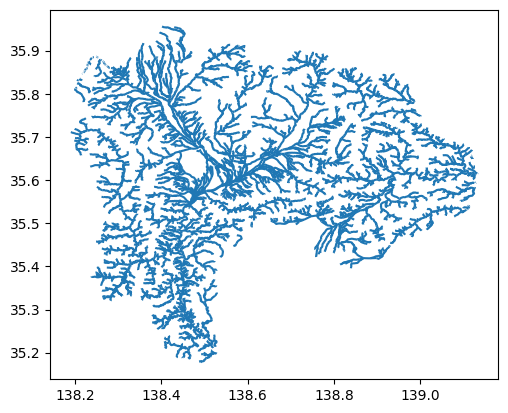

In [5]:
import matplotlib

山梨branch["geometry"].plot()

<Axes: >

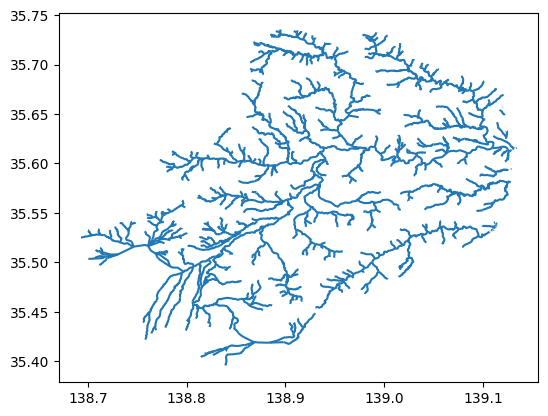

In [6]:
山梨branch[山梨branch["W05_001"].str.contains('830307')].plot()

<Axes: >

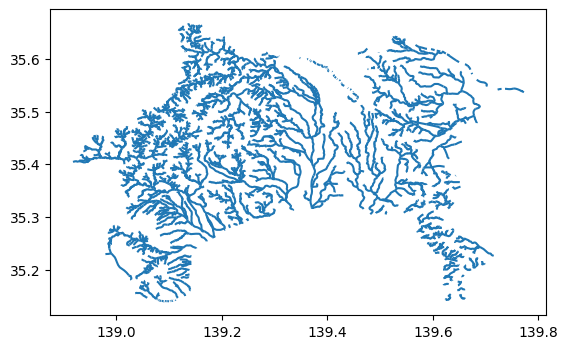

In [7]:
神奈川shape = f"{BASEDIR}W05-08_14_GML/W05-08_14-g_Stream.shp"
神奈川branch = gpd.read_file(神奈川shape)
神奈川branch.plot()

これは楽しい!

In [8]:
import pandas as pd
branch = pd.concat([山梨branch, 神奈川branch], axis=0, ignore_index=True)


<Axes: >

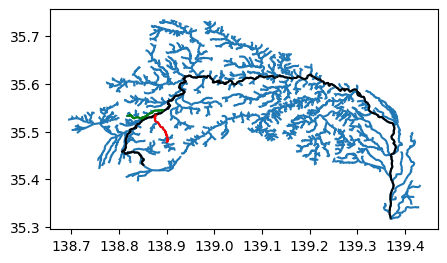

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(5, 3.5))

branch[branch["W05_001"].str.contains('830307')].plot(ax=ax1)
branch[branch["W05_004"].str.contains('相模川')].loc[:,"geometry"].plot(ax=ax1, color="black")
branch[branch["W05_004"].str.contains('鹿留川')].loc[:,"geometry"].plot(ax=ax1, color="red")
branch[branch["W05_004"].str.contains('柄杓流川')].loc[:,"geometry"].plot(ax=ax1, color="green")


川筋と、流域番号図を重ねることで、番号の対応が抽出できる。

In [10]:
山梨shape = f"{BASEDIR}../basin/W12-52A-19-01.1_GML/W12-52A_19_WatershedBoundary.shp"
山梨basin = gpd.read_file(山梨shape)
神奈川shape = f"{BASEDIR}../basin/W12-52A-14-01.1_GML/W12-52A_14_WatershedBoundary.shp"
神奈川basin = gpd.read_file(神奈川shape)
basin = pd.concat([山梨basin, 神奈川basin], axis=0, ignore_index=True)
basin


,W12_001,W12_002,W12_003,geometry
0,0,83029,0271,"POLYGON ((138.94697 35.91200, 138.94517 35.913..."
1,0,83029,0274,"POLYGON ((138.87467 35.90239, 138.87439 35.902..."
2,0,83029,0276,"POLYGON ((138.91158 35.91667, 138.91094 35.915..."
3,0,83029,0277,"POLYGON ((138.94697 35.91200, 138.94775 35.908..."
4,0,83029,0278,"POLYGON ((138.85953 35.86161, 138.86372 35.863..."
...,...,...,...,...
1227,0,85045,0146,"POLYGON ((138.97133 35.26578, 138.97139 35.266..."
1228,0,85045,0147,"POLYGON ((138.89264 35.31364, 138.89439 35.313..."
1229,0,85553,0076,"POLYGON ((139.07786 35.08936, 139.07786 35.088..."
1230,0,85553,0091,"POLYGON ((139.04717 35.12156, 139.04911 35.122..."


In [11]:
regions="""83032	40
83032	41
83032	42
83032	43
83032	44
83032	45
83032	46
83032	47
83032	48
83032	49
83032	50
83032	51
83032	52
83032	53
83032	54	秋山川	Y-9
83032	55	秋山川	Y-9
83032	56	秋山川	Y-9
83032	57	秋山川	Y-9
83032	58	秋山川	Y-9
83032	59	秋山川	Y-9
83032	60	秋山川	Y-9
83032	61	秋山川	Y-9
83032	62	秋山川	Y-9
83032	63	秋山川	Y-9
83032	64
83032	65
83032	66	境川
83032	67		Y-7
83032	68		Y-7
83032	69		Y-7
83032	70	鶴川	Y-7
83032	71	鶴川	Y-7
83032	72	鶴川	Y-7
83032	73	鶴川	Y-7
83032	74	鶴川	Y-7
83032	75		Y-7
83032	76		Y-7
83032	77	?
83032	78		Y-7
83032	79		Y-7
83032	80	葛野川	Y-7
83032	81	?	Y-6
83032	82	朝日川	Y-6
83032	83	朝日川	Y-6
83032	84	道志川
83032	85		Y-7
83032	86		Y-7
83032	87	葛野川	Y-7
83032	88	葛野川	Y-7
83032	89	葛野川	Y-7
83032	90	葛野川	Y-7
83032	91	葛野川	Y-7
83032	92	葛野川	Y-7
83032	93	葛野川	Y-7
83032	94	葛野川	Y-7
83032	95	?	Y-7
83032	96	?	Y-7
83032	97		Y-7
83032	98	笹子川	Y-7
83032	99	笹子川	Y-7
83032	100	笹子川	Y-7
83032	101	笹子川	Y-7
83032	102	笹子川	Y-7
83032	103	笹子川	Y-7
83032	104	笹子川	Y-7
83032	105	笹子川	Y-7
83032	106	笹子川	Y-7
83032	107	笹子川	Y-7
83032	108		Y-6
83032	109		Y-6
83032	110		Y-6
83032	111		Y-6
83032	112		Y-6
83032	113	朝日川	Y-6
83032	114	朝日川	Y-6
83032	115	(朝日川)	Y-6
83032	116	(朝日川)	Y-6
83032	117	(朝日川)	Y-6
83032	118	(朝日川)	Y-6
83032	119	(朝日川)	Y-6
83032	120	(朝日川)	Y-6
83032	121		Y-5
83032	122	大幡川	Y-5
83032	123	大幡川	Y-5
83032	124	?	Y-5
83032	125	?	Y-5
83032	126	柄杓流川	Y-5
83032	127	柄杓流川	Y-5
83032	128	柄杓流川	Y-5
83032	129	柄杓流川	Y-5
83032	130	柄杓流川	Y-5
83032	131		Y-6
83032	132	鹿留川	Y-6
83032	133	鹿留川	Y-6
83032	134	鹿留川	Y-6
83032	135	鹿留川	Y-6
83032	136		Y-4
83032	137		Y-4
83032	138		Y-4
83032	139		Y-4
83032	140		Y-4
83032	141
83032	142		Y-2
83032	143
83032	144
83032	145
83032	146	宮川	Y-2
83032	147		Y-4
83032	148		Y-4
83032	149		Y-4
83032	150		Y-4
83032	151		Y-4
83032	152		Y-4
83032	153		Y-4
83032	154		Y-4
83032	155		Y-4
83032	156		Y-1
83032	157		Y-1
83032	158		Y-1
83032	159		Y-1
83032	160		Y-1
83032	161	宮川	Y-2
83032	162	宮川	Y-2
83032	163	宮川	Y-2
83032	164	宮川	Y-2
83032	165	宮川	Y-2
83032	166	宮川	Y-2
83032	167		Y-4
83032	168	笹子川	Y-7
83032	169	柄杓流川	Y-5
83953	1		Y-2
83953	2		Y-2
83953	3		Y-2
83953	4		Y-2
83953	5		Y-2
83953	6		Y-2
83953	7		Y-2
83953	8		Y-2
83954	1		Y-2
83954	2		Y-2
""".splitlines()

regions = [line.split("\t") for line in regions]
regions = {(f"{b}", f"{int(x):04d}"): z for b,x,y,z in regions}
regions


{('83032', '0040'): '',
 ('83032', '0041'): '',
 ('83032', '0042'): '',
 ('83032', '0043'): '',
 ('83032', '0044'): '',
 ('83032', '0045'): '',
 ('83032', '0046'): '',
 ('83032', '0047'): '',
 ('83032', '0048'): '',
 ('83032', '0049'): '',
 ('83032', '0050'): '',
 ('83032', '0051'): '',
 ('83032', '0052'): '',
 ('83032', '0053'): '',
 ('83032', '0054'): 'Y-9',
 ('83032', '0055'): 'Y-9',
 ('83032', '0056'): 'Y-9',
 ('83032', '0057'): 'Y-9',
 ('83032', '0058'): 'Y-9',
 ('83032', '0059'): 'Y-9',
 ('83032', '0060'): 'Y-9',
 ('83032', '0061'): 'Y-9',
 ('83032', '0062'): 'Y-9',
 ('83032', '0063'): 'Y-9',
 ('83032', '0064'): '',
 ('83032', '0065'): '',
 ('83032', '0066'): '',
 ('83032', '0067'): 'Y-7',
 ('83032', '0068'): 'Y-7',
 ('83032', '0069'): 'Y-7',
 ('83032', '0070'): 'Y-7',
 ('83032', '0071'): 'Y-7',
 ('83032', '0072'): 'Y-7',
 ('83032', '0073'): 'Y-7',
 ('83032', '0074'): 'Y-7',
 ('83032', '0075'): 'Y-7',
 ('83032', '0076'): 'Y-7',
 ('83032', '0077'): '',
 ('83032', '0078'): 'Y-7',
 

In [12]:
bridges = {
    "桂川橋": (35.6167306, 139.1171345),  #
    "境川橋": (35.61726232577428, 139.13838232748358),  #
    "大月橋": (35.60887308, 138.93663348),
    "富士見橋": (35.52293, 138.84808),  # 35.52293、138.84808
    "昭和橋": (35.49653, 138.80937),
}

In [14]:
pip install japanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0223ba7616a9b296d702de6f1d18d3ca1e07f6e43a568d2af7315e7cdbfe08d8
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


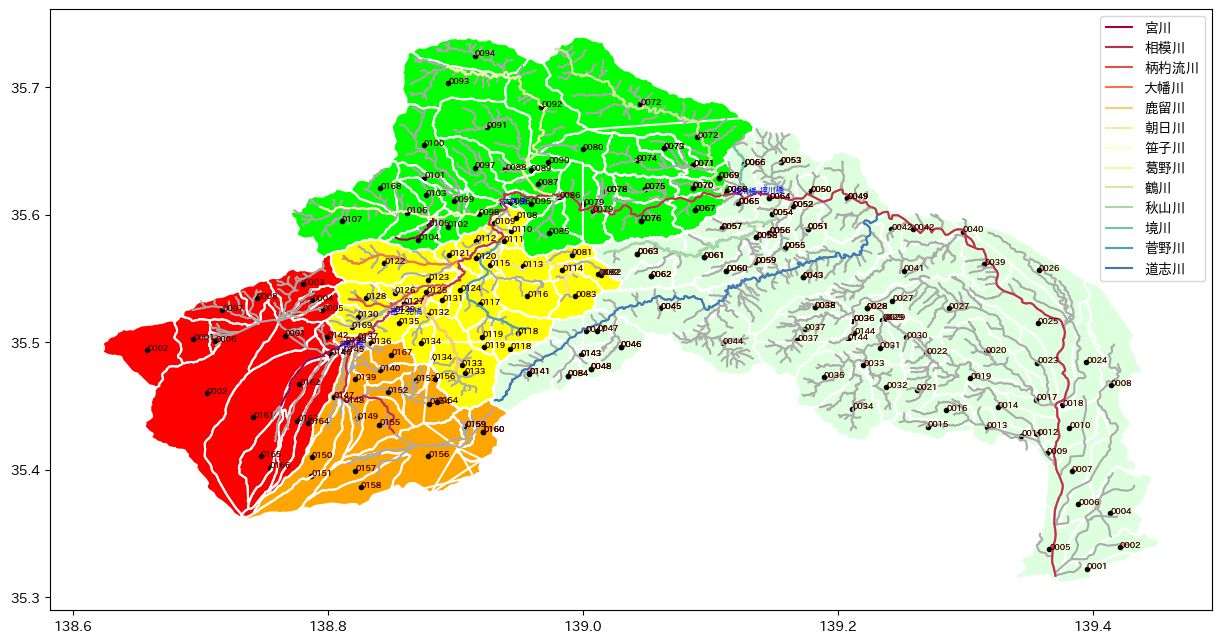

In [15]:
import japanize_matplotlib



# 大きめの図を作成する。あとで手作業する可能性があるので。
fig, ax1 = plt.subplots(figsize=(15, 15))

basins = ["83032", "83953", "83954"] # 相模川、河口湖、西湖
colors = ["#dfd", "#fdd", "#ddd"]

bcolors = {"Y-2": "red",
           "Y-3": "red",
           "Y-1": "orange",
           "Y-4": "orange",
           "Y-5": "yellow",
           "Y-6": "yellow",
           "Y-7": "lime",
           }

# 集水域を表示する。
for b, c in zip(basins, colors):
    basin[basin["W12_002"]==b]["geometry"].plot(ax=ax1, color=c)
    basin[basin["W12_002"]==b]["geometry"].boundary.plot(ax=ax1, color="#fff")

for (b, region), regionname in regions.items():
    # print(b, region, regionname)
    if regionname in bcolors:
        sub = basin[(basin["W12_002"]==b) & (basin["W12_003"]==region)]
        sub["geometry"].plot(ax=ax1, color=bcolors[regionname])
        # basin[basin["W12_002"]==b & basin["W12_003"]==region]["geometry"].boundary.plot(ax=ax1, color="#fff")






# 相模川全線を描く。
sagami = branch[branch["W05_001"].str.contains('830307')]
sagami.plot(ax=ax1, color="#aaa")

# # 川と名のつく支流の集合を作る。
# rivers = [river for river in set(sagami.loc[:, "W05_004"]) if river[-1] == "川"]
# print(rivers)

rivers = ["宮川", "相模川", "柄杓流川", "大幡川", "本川", "鹿留川", "朝日川", "笹子川", "葛野川", "鶴川", "秋山川", "境川", "菅野川", "道志川"]

cm = plt.get_cmap("Spectral")
for i, river in enumerate(rivers):
    for j, (_, r) in enumerate(sagami[sagami["W05_004"].str.contains(river)].iterrows()):
        g = gpd.GeoDataFrame(geometry=[r["geometry"]])
        if j == 0:
            g.plot(ax=ax1, color=cm(i/len(rivers)), label=r["W05_004"])
        else:
            g.plot(ax=ax1, color=cm(i/len(rivers)))

# 集水域にラベルをつける。
markersX = []
markersY = []
for i in range(len(basin)):
    if basin.loc[i, "W12_002"] not in basins:
        continue
    p = basin.loc[i, "geometry"].centroid
    # if type(p) is gpd.geoseries.GeoSeries:
    #     p = p.iloc[0]
    markersX.append(p.x)
    markersY.append(p.y)
    ax1.annotate(f"{basin.loc[i, 'W12_003']}", (p.x, p.y), size=6,color="#400")
    ax1.annotate(f"{basin.loc[i, 'W12_003']}", (p.x, p.y), size=6,color="#400")
ax1.scatter(markersX, markersY, marker=".", color="black")

# 流末測定点
markersX = []
markersY = []
for b, p in bridges.items():
    markersX.append(p[1])
    markersY.append(p[0])
    ax1.annotate(b, (p[1], p[0]), size=6,color="blue")
ax1.scatter(markersX, markersY, marker=".", color="blue")


ax1.legend()

fig.savefig("branchmap.pdf")


ブロックを融合する。

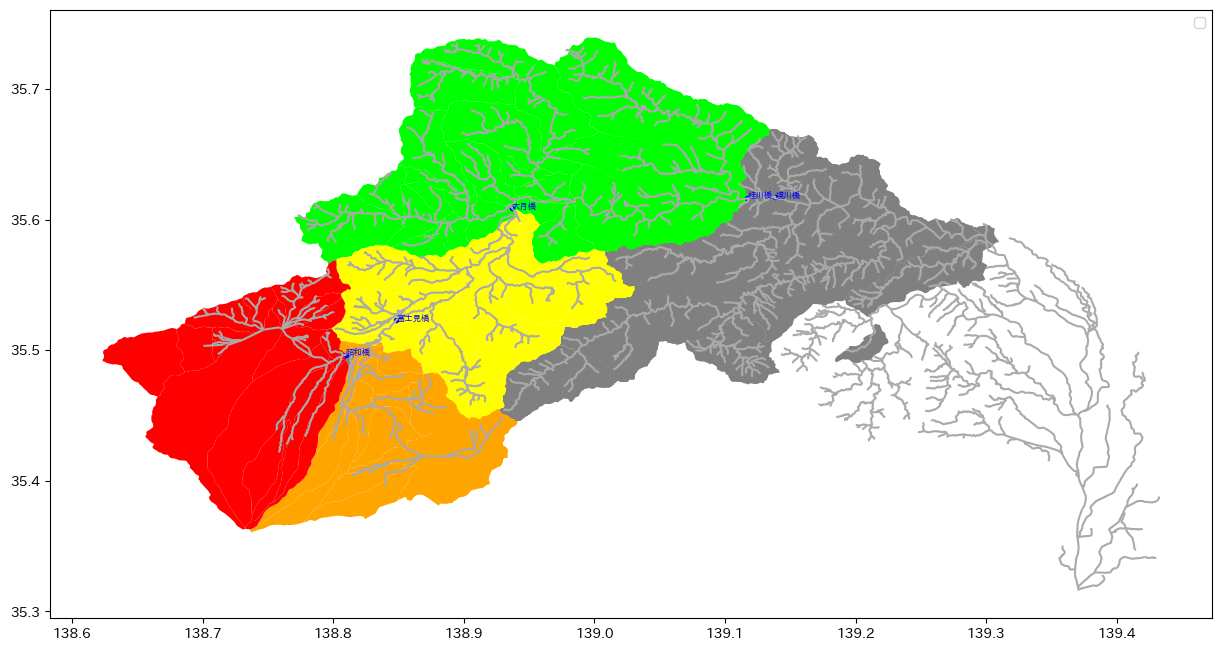

In [16]:
basins = ["83032", "83953", "83954"] # 相模川、河口湖、西湖
colors = ["#dfd", "#fdd", "#ddd"]

bcolors = {"Y-2": "red",
           "Y-3": "red",
           "Y-1": "orange",
           "Y-4": "orange",
           "Y-5": "yellow",
           "Y-6": "yellow",
           "Y-7": "lime",
           }
fig, ax1 = plt.subplots(figsize=(15, 15))

blocks = dict()
for (b, region), regionname in regions.items():
    # print(b, region, regionname)
    if regionname in bcolors:
        color = bcolors[regionname]
    else:
        color = "gray"
    if color not in blocks:
        blocks[color] = []
    sub = basin[(basin["W12_002"]==b) & (basin["W12_003"]==region)]
    blocks[color].append(sub["geometry"])
    # sub["geometry"].plot(ax=ax1, color=bcolors[regionname])
    # basin[basin["W12_002"]==b & basin["W12_003"]==region]["geometry"].boundary.plot(ax=ax1, color="#fff")

blocks = {color:pd.concat(block) for color, block in blocks.items()}

# blockは辞書。キーは色、値は下の地図の領域を表す。
for color, block in blocks.items():
    block.plot(color=color, ax=ax1)
    block.to_file(f'{color}.geojson', driver='GeoJSON')

# 相模川全線を描く。
sagami = branch[branch["W05_001"].str.contains('830307')]
sagami.plot(ax=ax1, color="#aaa")

# 流末測定点
markersX = []
markersY = []
for b, p in bridges.items():
    markersX.append(p[1])
    markersY.append(p[0])
    ax1.annotate(b, (p[1], p[0]), size=6,color="blue")
ax1.scatter(markersX, markersY, marker=".", color="blue")


ax1.legend()

fig.savefig("branchmap-simple.pdf")
